# 3 - Plot

## Load all results data and compute mean & std

In [13]:
import numpy as np
import os
import matplotlib.pyplot as plt

import sys
PROJ_DIR = os.path.realpath(os.path.dirname(os.path.abspath('')))
sys.path.append(os.path.join(PROJ_DIR,'src'))
import plt_configs

keys = ['correct_pairings_inv', 'correct_pairings_basX', 'spearman_inv', 'spearman_basX', 'aucs_inv', 'aucs_basX', 'spearman_exceptional_inv', 'spearman_exceptional_basX']

result_dict = {}

DATASET_NAME = 'avila'
MODEL_NAME = '0'
GENERATION_MODE = ''
TARGET_MEASURE = '' #'_AttributionLocalisation' | '_TopKIntersection' | '_RelevanceRankAccuracy' | '_AUC' | 'EfficientMPRT'
SUFFIX = '' #'_EfficientMPRT'

#FIG2A, FIG3A, FIG4A, FIG5A & FIG6A
#DATASET_NAME, MODEL_NAME, GENERATION_MODE, TARGET_MEASURE, SUFFIX = 'avila', '0', '', '', ''
#FIG2B, FIG3B, FIG4B & FIG5B
#DATASET_NAME, MODEL_NAME, GENERATION_MODE, TARGET_MEASURE, SUFFIX = 'glass', '0', '', '', ''
#FIG6B
#DATASET_NAME, MODEL_NAME, GENERATION_MODE, TARGET_MEASURE, SUFFIX = 'avila', 'ood-mean', '', '', ''
#FIG6C
DATASET_NAME, MODEL_NAME, GENERATION_MODE, TARGET_MEASURE, SUFFIX = 'avila', 'untrained', '', '', ''

num_files = 0 # Count how many files are involved for use below

for f in os.listdir(os.path.join(PROJ_DIR, 'results')):
    if f.startswith(DATASET_NAME) and f.endswith(f'{MODEL_NAME}{GENERATION_MODE}{SUFFIX}_results{TARGET_MEASURE}.npz'):#{MODEL_NAME}{GENERATION_MODE}_localization_s_area_results{TARGET_MEASURE}.npz
        FILENAME = os.path.join(PROJ_DIR, 'results', f)
        print(FILENAME)
        num_files += 1
        with np.load(FILENAME) as data:
            for k in keys:
                d = np.expand_dims(data[k], axis=0)
                if k in result_dict:
                    result_dict[k] = np.vstack((result_dict[k], d))
                else:
                    result_dict[k] = d

for k in keys:
    result_dict[f'{k}_mean'] = np.nanmean(result_dict[k], axis=0)
    result_dict[f'{k}_std'] = np.nanstd(result_dict[k], axis=0)

# DEBUG
#print(result_dict['spearman_inv'])
#print(result_dict['spearman_inv_mean'])
#print(result_dict['spearman_basX'])
#print(result_dict['spearman_basX_mean'])

/home/eirasf/Escritorio/eval-project/results/avila_20-untrained_results.npz
/home/eirasf/Escritorio/eval-project/results/avila_40-untrained_results.npz
/home/eirasf/Escritorio/eval-project/results/avila_50-untrained_results.npz
/home/eirasf/Escritorio/eval-project/results/avila_30-untrained_results.npz
/home/eirasf/Escritorio/eval-project/results/avila_10-untrained_results.npz


/tmp/ipykernel_10564/2448460204.py:45: RuntimeWarning: Mean of empty slice
  result_dict[f'{k}_mean'] = np.nanmean(result_dict[k], axis=0)
/home/eirasf/miniconda3/envs/xai-anna/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


qmean_mean = 0.054822244
30 0.1388  |  0.1046  |  0.0567  |  0.0175  |  0.0018
qmean_mean = 0.05145965
10 0.1761  |  0.1568  |  0.0373  |  0.0001  |  0.0000
qmean_mean = 0.053858817
20 0.1658  |  0.1235  |  0.0548  |  0.0036  |  0.0000
qmean_mean = 0.054274835
40 0.1526  |  0.1034  |  0.0514  |  0.0158  |  0.0013
qmean_mean = 0.09509716
50 0.1413  |  0.0960  |  0.0557  |  0.0204  |  0.0017


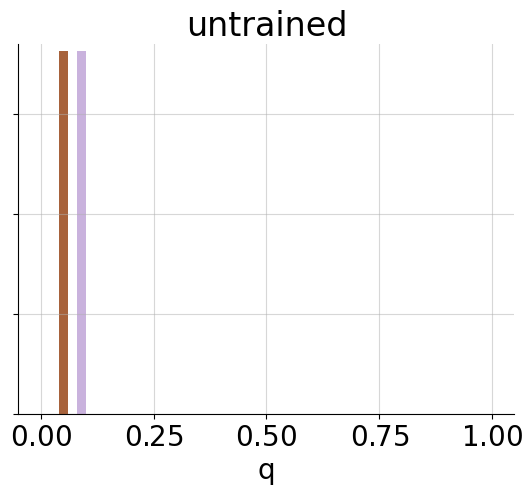

[[1.38824405e-01 1.04645062e-01 5.67250882e-02 1.75088183e-02
  1.81051587e-03]
 [1.76111111e-01 1.56803902e-01 3.72712743e-02 6.94444444e-05
  0.00000000e+00]
 [1.65812941e-01 1.23520723e-01 5.48247354e-02 3.58630952e-03
  0.00000000e+00]
 [1.52595899e-01 1.03380181e-01 5.13822751e-02 1.57572751e-02
  1.30180776e-03]
 [1.41279211e-01 9.59793871e-02 5.57346781e-02 2.03764330e-02
  1.72343474e-03]]
AVG STD: 0.0009819384


In [14]:
if TARGET_MEASURE == '':
    TARGET_MEASURE = '_qmeans'

boundaries = [0.5, 1, 1.5, 2, 2.5]#, 3, 3.5]
counts_by_sigma_level =  np.zeros((num_files, len(boundaries)))
filenames = []
qmean_means = []
qmean_stds = []

# Genetic datasets need the distribution parameters of the random datasets, so load all dataset counts
import json
DATA_PATH = os.path.join(PROJ_DIR,'assets','data')
with open(os.path.join(DATA_PATH, 'dataset-counts.json')) as fIn:
    datasets = json.load(fIn)

fig, ax = plt.subplots()
#plt.figure(figsize=(3,2))
current_file_num = 0
for f in os.listdir(os.path.join(PROJ_DIR, 'results')):
    if f.startswith(DATASET_NAME) and f.endswith(f'{MODEL_NAME}{GENERATION_MODE}_measures.npz'):
        FILENAME = os.path.join(PROJ_DIR, 'results', f)
        filenames.append(f)
        short_filename = f.replace("_measures.npz", "").replace(DATASET_NAME, "").replace(MODEL_NAME, "").replace("_", "").replace("-", "")
        with np.load(FILENAME) as data:
            ax.hist(data[TARGET_MEASURE[1:]],\
                    alpha = 0.5,\
                    label = f'{short_filename} qmean~N({np.mean(data[TARGET_MEASURE[1:]]):.2f},{np.std(data[TARGET_MEASURE[1:]]):.2f})',\
                    #edgecolor='black',\
                    bins = 50,\
                    range=(0,1)\
                    )
            #plt.xlim(0,1)

            if GENERATION_MODE == '_genetic':
                with np.load(FILENAME.replace('_genetic', '')) as data_ref:
                    activation_ref = data_ref['output_curves'][8][-1]
                    ax.hist(data_ref['qmeans'],\
                            alpha = 0.5,\
                            label = f'{short_filename.replace("genetic", "")} qmean~N({np.mean(data_ref["qmeans"]):.2f},{np.std(data_ref["qmeans"]):.2f}) [{activation_ref:.2f}]',\
                            bins = 50\
                            )

            exceptional_counts = []
            # Compute z-score
            if GENERATION_MODE == '_genetic':
                qmean_mean = float(datasets[DATASET_NAME][f.replace('_genetic','')]['mean'])
                qmean_std = float(datasets[DATASET_NAME][f.replace('_genetic','')]['std'])
            else:
                qmean_mean = np.mean(data[TARGET_MEASURE[1:]])
                qmean_std = np.std(data[TARGET_MEASURE[1:]])
                print(f'{qmean_mean = }')
                qmean_means.append(qmean_mean)
                qmean_stds.append(qmean_std)
            
            z_scores = ((data[TARGET_MEASURE[1:]] - qmean_mean) / qmean_std).flatten()

            # Count exceptional rankings
            for i in range(1,len(boundaries)+1):
                bottom_limit = boundaries[i-1]
                top_limit = float('inf')
                if i < len(boundaries):
                    top_limit = boundaries[i]
                fraction_count = np.sum(np.logical_and(bottom_limit<=z_scores, z_scores<top_limit).astype(float) / z_scores.shape[0])
                exceptional_counts.append(fraction_count)
                counts_by_sigma_level[current_file_num, i - 1] = fraction_count
            print(f'{short_filename} {"  |  ".join((map(lambda x: f"{x:.4f}", exceptional_counts)))}')
        current_file_num += 1
#plt.legend()
ax.set_ylim(0,3.7e6)
ax.set_title(f'{"trained" if MODEL_NAME=="0" else MODEL_NAME}')
ax.set_xlabel('q')
if MODEL_NAME == "0":
    ax.set_ylabel('# elems')
else:
    ax.set_yticklabels([])
    
plt.savefig(os.path.join(PROJ_DIR, 'results', 'plots', f'{DATASET_NAME}_{MODEL_NAME}{GENERATION_MODE}_qmean_dists.png'))
plt.show()

print(counts_by_sigma_level)
print('AVG STD:', np.mean(qmean_stds))

In [12]:
dataset_counts = {} if DATASET_NAME not in datasets else datasets[DATASET_NAME]
for i, f in enumerate(filenames):
    if GENERATION_MODE == '_genetic':
        dataset_counts[f.replace('_genetic', '')]['counts_genetic'] = list(counts_by_sigma_level[i])
    else:
        dataset_counts[f] = {'counts':list(counts_by_sigma_level[i]), 'mean': str(qmean_means[i]), 'std': str(qmean_stds[i])}

datasets[DATASET_NAME] = dataset_counts

with open(os.path.join(DATA_PATH, 'dataset-counts.json'), 'w') as fOut:
    json.dump(datasets, fOut)

## Plot correct pairings

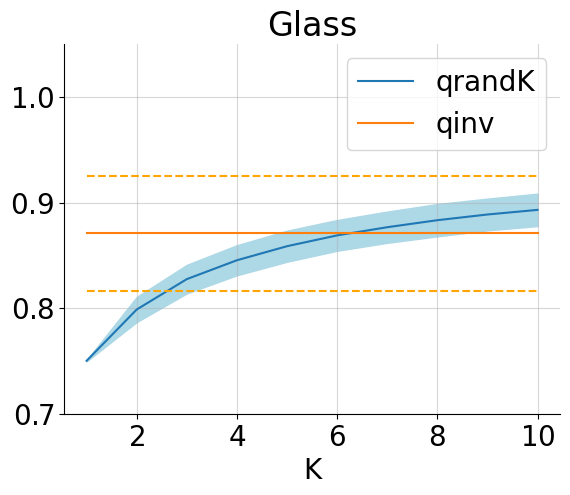

delta_p [0.1205991]


In [13]:
#plt.figure(figsize=(3,2))
plt.fill_between(range(1,11), result_dict['correct_pairings_basX_mean']+result_dict['correct_pairings_basX_std'], result_dict['correct_pairings_basX_mean']-result_dict['correct_pairings_basX_std'], color='lightblue')
plt.plot(range(1,11),result_dict['correct_pairings_basX_mean'], label='qrandK')
#plt.title(f'Correct pairs vs. K - {DATASET_NAME.capitalize()}')
plt.title(f'{DATASET_NAME.capitalize()}')
plt.plot([1,10], [result_dict['correct_pairings_inv_mean']+result_dict['correct_pairings_inv_std'], result_dict['correct_pairings_inv_mean']+result_dict['correct_pairings_inv_std']], color='orange', linestyle = 'dashed')
plt.plot([1,10], [result_dict['correct_pairings_inv_mean']-result_dict['correct_pairings_inv_std'], result_dict['correct_pairings_inv_mean']-result_dict['correct_pairings_inv_std']], color='orange', linestyle = 'dashed')
plt.plot([1,10],[result_dict['correct_pairings_inv_mean'],result_dict['correct_pairings_inv_mean']], label='qinv')
plt.ylim(0.7,1.05)
plt.xlabel('K')
#plt.ylabel('q')
plt.legend()
plt.savefig(os.path.join(PROJ_DIR, 'results', 'plots', f'{DATASET_NAME}_{MODEL_NAME}{GENERATION_MODE}_correct_pairs.png'))
plt.show()

delta_p = result_dict['correct_pairings_inv_mean']-result_dict['correct_pairings_basX_mean'][0]
print('delta_p', delta_p)

## Plot Spearman correlation

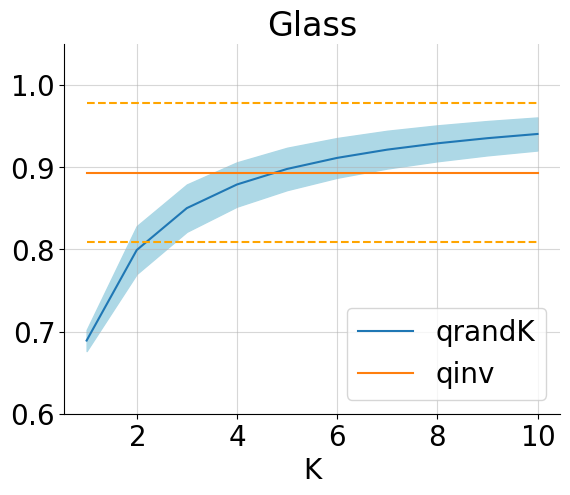

delta_rho [0.20432541]


In [15]:
#plt.figure(figsize=(3,2))
plt.fill_between(range(1,11), result_dict['spearman_basX_mean']+result_dict['spearman_basX_std'], result_dict['spearman_basX_mean']-result_dict['spearman_basX_std'], color='lightblue')
plt.plot(range(1,11),result_dict['spearman_basX_mean'], label='qrandK')
#plt.title('Spearman correlation vs. K')
plt.title(f'{DATASET_NAME.capitalize()}')
plt.plot([1,10], [result_dict['spearman_inv_mean']+result_dict['spearman_inv_std'], result_dict['spearman_inv_mean']+result_dict['spearman_inv_std']], color='orange', linestyle = 'dashed')
plt.plot([1,10], [result_dict['spearman_inv_mean']-result_dict['spearman_inv_std'], result_dict['spearman_inv_mean']-result_dict['spearman_inv_std']], color='orange', linestyle = 'dashed')
plt.plot([1,10],[result_dict['spearman_inv_mean'],result_dict['spearman_inv_mean']], label='qinv')
plt.ylim(0.6,1.05)
plt.xlabel('K')
#plt.ylabel('q')
plt.legend()
plt.savefig(os.path.join(PROJ_DIR, 'results', 'plots', f'{DATASET_NAME}_{MODEL_NAME}{GENERATION_MODE}_spearman.png'))
plt.show()

delta_rho = result_dict['spearman_inv_mean']-result_dict['spearman_basX_mean'][0]
print('delta_rho', delta_rho)

## Plot ability to detect exceptional rankings

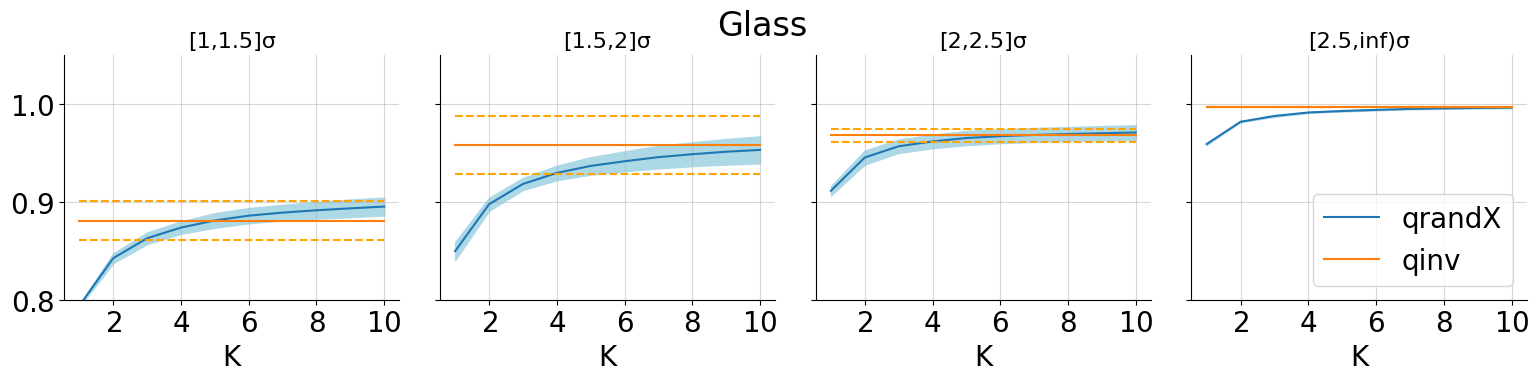

In [23]:
boundaries = [0.5, 1, 1.5, 2, 2.5]#, 3, 3.5]

fig, axes = plt.subplots(1, 4, figsize=(16, 4))
for i, ax in enumerate(axes.flat):
    ax.fill_between(range(1,11), result_dict['aucs_basX_mean'][:,i+1]+result_dict['aucs_basX_std'][:,i+1], result_dict['aucs_basX_mean'][:,i+1]-result_dict['aucs_basX_std'][:,i+1], color='lightblue')
    ax.plot(range(1,11),result_dict['aucs_basX_mean'][:,i+1], label='qrandX')
    ax.set_xlabel('K')
    counts_str = '|'.join(map(lambda x:f'{x:.2f}',counts_by_sigma_level[:, i]))
    if i<len(boundaries)-2:
        #ax.set_title(f'[{boundaries[i+1]},{boundaries[i+1+1]}]σ ({counts_str})', fontsize=10)
        ax.set_title(f'[{boundaries[i+1]},{boundaries[i+1+1]}]σ', fontsize=16)
    else:
        #ax.set_title(f'[{boundaries[i+1]},inf)σ ({counts_str})', fontsize=10)
        ax.set_title(f'[{boundaries[i+1]},inf)σ', fontsize=16)
    if i>0:
        #ax.set_yticks([])
        ax.set_yticklabels([])
    ax.set_xticks([2,4,6,8,10])
    ax.plot([1,10], [result_dict['aucs_inv_mean'][i+1]+result_dict['aucs_inv_std'][i+1], result_dict['aucs_inv_mean'][i+1]+result_dict['aucs_inv_std'][i+1]], color='orange', linestyle = 'dashed')
    ax.plot([1,10], [result_dict['aucs_inv_mean'][i+1]-result_dict['aucs_inv_std'][i+1], result_dict['aucs_inv_mean'][i+1]-result_dict['aucs_inv_std'][i+1]], color='orange', linestyle = 'dashed')
    ax.plot([1,10],[result_dict['aucs_inv_mean'][i+1],result_dict['aucs_inv_mean'][i+1]], label='qinv')

    if i==3:
        ax.legend(loc='lower right')
    ax.set_ylim(0.8,1.05)
plt.tight_layout()
#plt.suptitle('AUC vs. K')
plt.suptitle(f'{DATASET_NAME.capitalize()}')
plt.savefig(os.path.join(PROJ_DIR, 'results', 'plots', f'{DATASET_NAME}_{MODEL_NAME}{GENERATION_MODE}_auc_exceptional.png'))
plt.show()
plt.close(fig)

## Plot Spearman correlation for exceptional rankings

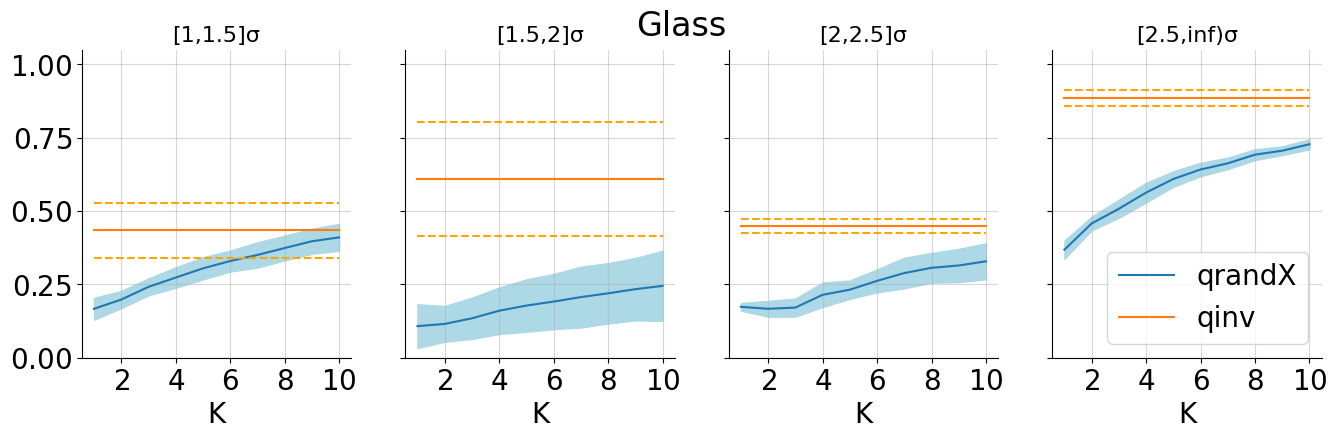

In [22]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
for i, ax in enumerate(axes.flat):
    ax.fill_between(range(1,11), result_dict['spearman_exceptional_basX_mean'][:,i+1]+result_dict['spearman_exceptional_basX_std'][:,i+1], result_dict['spearman_exceptional_basX_mean'][:,i+1]-result_dict['spearman_exceptional_basX_std'][:,i+1], color='lightblue')
    ax.plot(range(1,11),result_dict['spearman_exceptional_basX_mean'][:,i+1], label='qrandX')
    ax.set_xlabel('K')
    counts_str = '|'.join(map(lambda x:f'{x:.2f}',counts_by_sigma_level[:, i]))
    if i<len(boundaries)-2:
        ax.set_title(f'[{boundaries[i+1]},{boundaries[i+1+1]}]σ', fontsize=16)
    else:
        ax.set_title(f'[{boundaries[i+1]},inf)σ', fontsize=16)
    if i>0:
        #ax.set_yticks([])
        ax.set_yticklabels([])
    ax.plot([1,10], [result_dict['spearman_exceptional_inv_mean'][i+1]+result_dict['spearman_exceptional_inv_std'][i+1], result_dict['spearman_exceptional_inv_mean'][i+1]+result_dict['spearman_exceptional_inv_std'][i+1]], color='orange', linestyle = 'dashed')
    ax.plot([1,10], [result_dict['spearman_exceptional_inv_mean'][i+1]-result_dict['spearman_exceptional_inv_std'][i+1], result_dict['spearman_exceptional_inv_mean'][i+1]-result_dict['spearman_exceptional_inv_std'][i+1]], color='orange', linestyle = 'dashed')
    ax.plot([1,10],[result_dict['spearman_exceptional_inv_mean'][i+1],result_dict['spearman_exceptional_inv_mean'][i+1]], label='qinv')
    ax.set_ylim(0,1.05)
    ax.set_xticks([2,4,6,8,10])
    if i==3:
        ax.legend(loc='lower right')
plt.suptitle('Spearman correlation vs. K')
plt.suptitle(f'{DATASET_NAME.capitalize()}')
plt.savefig(os.path.join(PROJ_DIR, 'results', 'plots', f'{DATASET_NAME}_{MODEL_NAME}{GENERATION_MODE}_spearman_exceptional.png'))
plt.show()

## Plot correct pairings vs z-index

glass_30_measures.npz


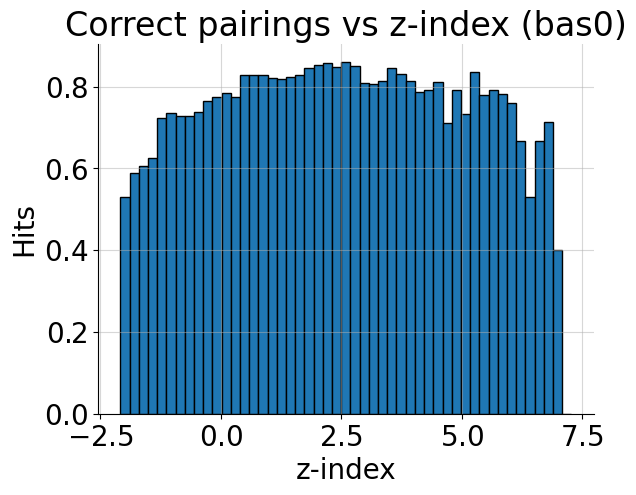

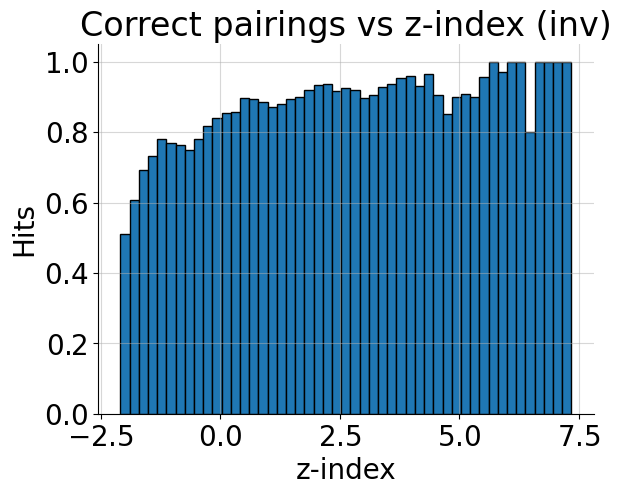

glass_40_measures.npz


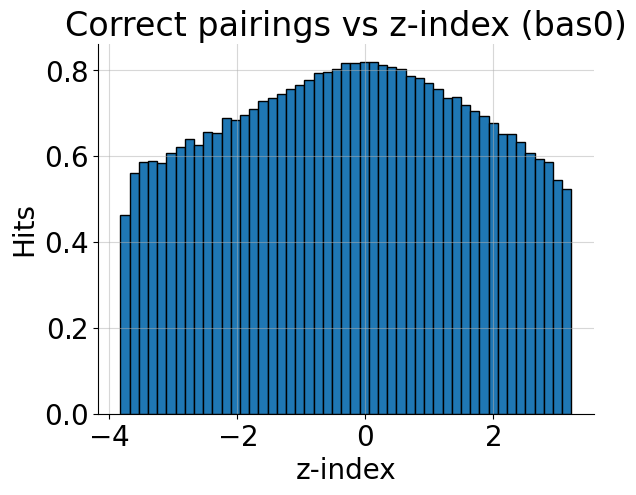

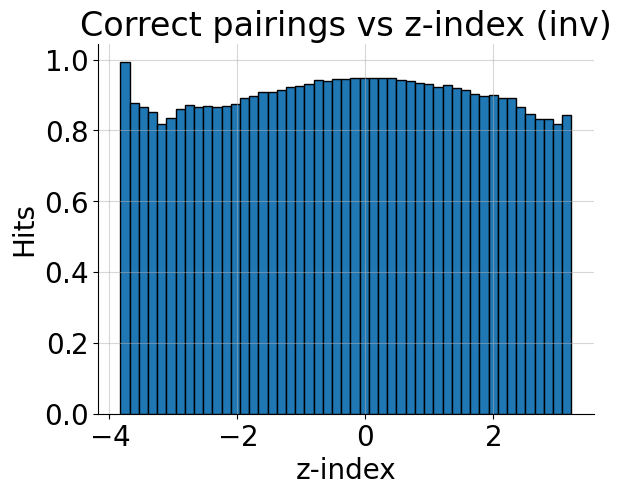

glass_50_measures.npz


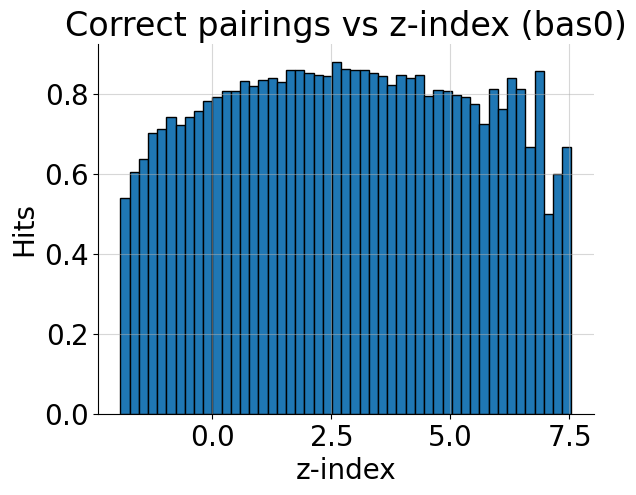

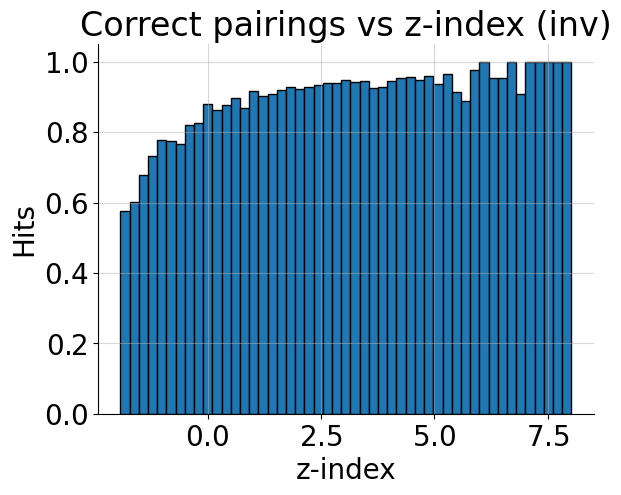

glass_20_measures.npz


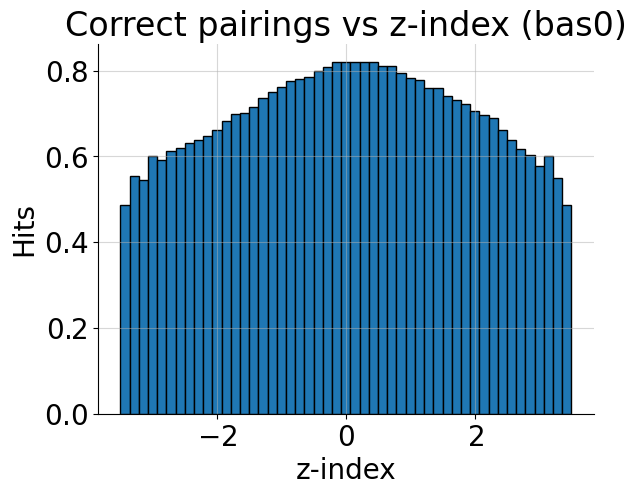

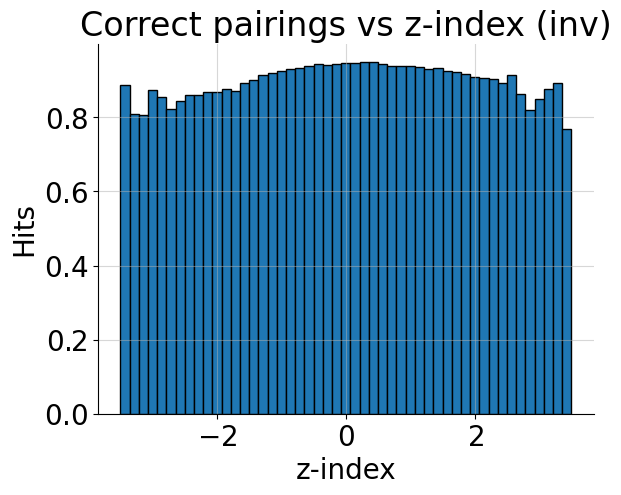

glass_10_measures.npz


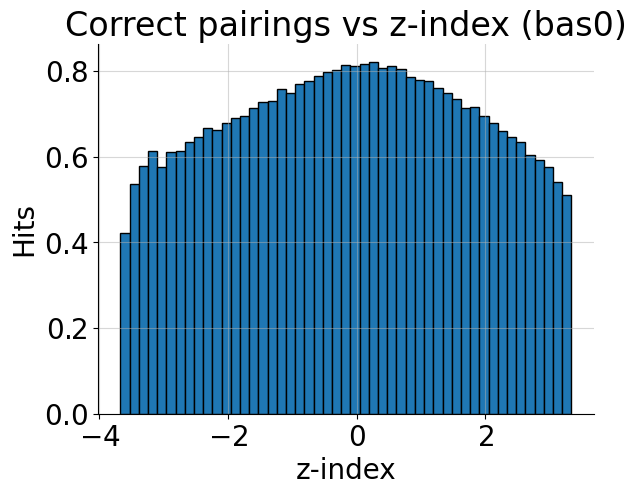

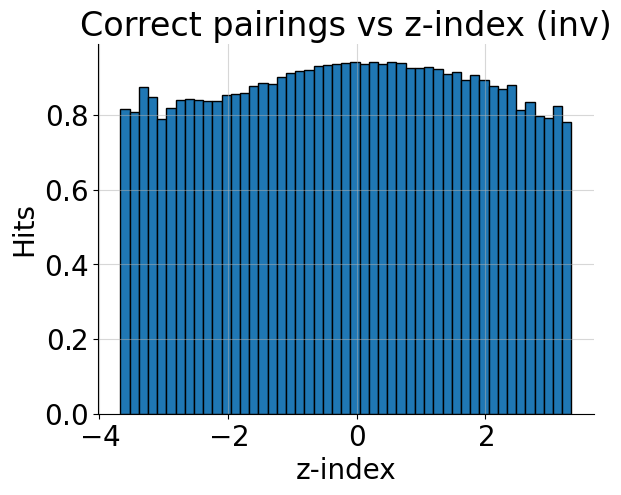

In [24]:
import sys
sys.path.append(os.path.join(PROJ_DIR,'src'))
import xai_faithfulness_experiments_lib_edits as ff

for FILENAME in os.listdir(os.path.join(PROJ_DIR,'results')):
    if FILENAME.startswith(DATASET_NAME) and FILENAME.endswith(f'{MODEL_NAME}{GENERATION_MODE}_measures.npz'):
        print(FILENAME)

        # Load data
        data = ff.load_generated_data(os.path.join(PROJ_DIR, 'results', FILENAME))
        qmeans = data['qmeans']
        #qmeans_basX = [data['qmean_bas']] # We don't look at qmean_bas, it will be recomputed later with the appropriate reference
        qmeans_basX = []
        qmeans_inv = data['qmean_invs']

        # Compute qmeans_bas[2-10]
        def compute_qbas(measure, num_samples, reference:np.ndarray):
            random_indices = np.random.randint(0,  reference.shape[0], (reference.shape[0], num_samples))
            random_qmeans = reference[random_indices]
            mean = np.mean(random_qmeans, axis=1)

            # First way to deal with std==0; add some epsilon
            #std = np.std(random_qmeans, axis=1) + 1e-10

            # Second way to deal with std==0; ignore std (divide by 1)
            std = np.std(random_qmeans, axis=1)
            std[std==0] = 1

            # Always ignore std
            std=1
            return (measure - mean) / std
        for i in range(1,11):
            # If data is genetic, compute qbas with random data from other file
            qmeans_basX.append(compute_qbas(qmeans, i, qmeans))

        # Compute z-score
        qmean_mean = np.mean(qmeans)
        qmean_std = np.std(qmeans)

        z_scores = ((qmeans - qmean_mean) / qmean_std).flatten()

        def correct_orderings_by_zscore(truths, estimators, zscore):
            '''
            Creates len(truth) x,y pairs and computes the fraction of them for which (truths[x]<truths[y] and estimators[x]<estimators[y]) or (truths[x]>truths[y] and estimators[x]>estimators[y])
            Inputs:
                - Truths & estimators contain num_elems floats
            Output:
                - Float representing the fraction of correctly ordered pairings
            '''
            xs = np.random.permutation(truths.size)
            ys = np.random.permutation(truths.size)
            truthX_lt_Y = truths[xs] < truths[ys]
            estimatorX_lt_Y = estimators[xs] < estimators[ys]
            hits = truthX_lt_Y==estimatorX_lt_Y
            return np.hstack((hits, np.expand_dims(zscore[xs]+zscore[ys], axis=1)))

        def plot_hits_vs_zindex(correct_orderings_by_zscore, name):
            # Define y as the bin edges, here we're just using the unique y values as edges
            y_values = correct_orderings_by_zscore[:, 1]

            # The number of bins should be one less than the number of unique y values
            # because in histogram bins are between the edges
            bins = np.linspace(y_values.min(), y_values.max(), 50)

            # Use the x values as weights and the y values to determine the bins
            sum_hist, edges = np.histogram(y_values, bins=bins, weights=correct_orderings_by_zscore[:, 0])

            # Now get the counts in each y bin to calculate the average
            count_hist, _ = np.histogram(y_values, bins=bins)

            # Avoid division by zero by replacing zero counts with NaN (or another value)
            # This will give a NaN result for average where count is zero
            averages = np.divide(sum_hist, count_hist, out=np.zeros_like(sum_hist), where=count_hist!=0)

            # Plotting the average x values for each bin of y
            plt.bar(edges[:-1], averages, width=np.diff(edges), edgecolor="black", align="edge")

            plt.xlabel('z-index')
            plt.ylabel('Hits')
            plt.title(f'Correct pairings vs z-index ({name})')
            plt.show()

        correct_pairings_basX = []
        for i in range(len(qmeans_basX)):
            correct_pairings_basX = correct_orderings_by_zscore(qmeans, qmeans_basX[i], z_scores)
            plot_hits_vs_zindex(correct_pairings_basX, f'bas{i}')
            break
        
        correct_pairings_inv = correct_orderings_by_zscore(qmeans, qmeans_inv, z_scores)
        plot_hits_vs_zindex(correct_pairings_inv, 'inv')